# Identification by voice Recognition 


This Notebook has three main sections.
1. Extract the features of the WAV files, save them into CSV files and store them into Pandas
2. The model will be trained based on the data set created by https://github.com/Jakobovski/free-spoken-digit-dataset
3. The model will be re-trained based on the previous data plus the recordings made by Ankor (Indian accent), Caroline (Canadian female child accent) and Rodolfo (Brazilian accent)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Section 1

The output of this section is the CSV files with the data to be handle by the model

```
trainData     : ../data/recordings/train 
testData      : ../data/recordings/test
moreTrainData : ../data/recordings/moreSpeakersTrain
moreTestData  : ../data/recordings/moreSpeakersTest
```


In [2]:
# If true, the WAV files will be read and their features will be saved in the CSV files
# As this is the most time consuming task, only enable it if you don't have the CSV files yet
CREATE_CSV_FILES = True

In [3]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
MORE_TRAIN_CSV_FILE = "more_train.csv"
MORE_TEST_CSV_FILE = "more_test.csv"


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os
import pandas as pd
import csv
from sklearn import preprocessing

In [5]:
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        #Extract features from the audio files 
        #Extract Chromagram.
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        #root-mean-square
        rmse = librosa.feature.rms(y=y)
        #Spectral Centroid
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        #spectral_bandwidth
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        #spectral_rolloff
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        #zero_crossing_rate
        zcr = librosa.feature.zero_crossing_rate(y)
        #Mel-frequency cepstral coefficients
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("drive/MyDrive/data/recordings/train", TRAIN_CSV_FILE)
    extractWavFeatures("drive/MyDrive/data/recordings/test", TEST_CSV_FILE)
    extractWavFeatures("drive/MyDrive/data/recordings/moreSpeakersTrain", MORE_TRAIN_CSV_FILE)
    extractWavFeatures("drive/MyDrive/data/recordings/moreSpeakersTest", MORE_TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder drive/MyDrive/data/recordings/train will be saved to train.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder drive/MyDrive/data/recordings/test will be saved to test.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder drive/MyDrive/data/recordings/moreSpeakersTrain will b

In [8]:
#Reading a dataset and convert file name to corresbonding number

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    # we have six speakers: 
    # 0: Jackson
    # 1: Nicolas 
    # 2: Theo
    # 3: Ankur
    # 4: Caroline
    # 5: Rodolfo
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][2]
        #print(speaker)
        if speaker == "j":
            speaker = "0"
        elif speaker == "n":
            speaker = "1"
        elif speaker == "t":
            speaker = "2"
        elif speaker == "a":
            speaker = "3"
        elif speaker == "c":
            speaker = "4"
        elif speaker == "r":
            speaker = "5"
        else: 
            speaker = "6"
        #print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data



In [9]:
#Traindata datafraim (train.csv)
trainData = preProcessData(TRAIN_CSV_FILE)
#testData datafraim (test.csv)
testData = preProcessData(TEST_CSV_FILE)
#
moreTrainData = preProcessData(MORE_TRAIN_CSV_FILE)
#
moreTestData = preProcessData(MORE_TEST_CSV_FILE)
trainData

train.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth  ...     mfcc19     mfcc20  number
0  0.087319         829.198417          800.903111  ...   7.411407 -13.051958       0
1  0.935458        1409.889900         1288.562672  ...   8.977181  -9.099283       1
2  0.098626         823.451640          765.603431  ...   3.140596 -14.405218       0
3  0.004241        1887.218045         1125.280956  ...  14.394066 -15.875212       2
4  0.896434        1531.667146         1210.204884  ...  10.042933 -13.775798       1

[5 rows x 26 columns]
test.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth  ...     mfcc19     mfcc20  number
0  0.006945        1305.617438         1040.166164  ...   6.463083 -17.603457       2
1  0.062125         861.642146          872.413522  ...   0.796169 -22.551965       0
2  0.932617        1569.627869         1246.542760  ...  10.192029 -13.928979       1
3  0

,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,number
0,0.087319,829.198417,800.903111,1473.124426,0.042883,-303.595663,213.682367,-38.200757,-2.329614,8.204157,-38.143836,-12.176614,-19.031963,-29.155537,4.714664,-4.210158,-13.328276,-1.340355,-18.168178,-5.210740,13.773573,-19.089013,-17.640466,7.411407,-13.051958,0
1,0.935458,1409.889900,1288.562672,2964.404297,0.039062,28.321260,210.838076,-90.089424,38.338328,28.176799,-38.006319,23.009903,4.318815,-26.432799,15.993199,-5.743022,-18.292063,11.274942,-12.879364,-16.745001,7.328799,-7.491760,-1.899807,8.977181,-9.099283,1
2,0.098626,823.451640,765.603431,1423.458059,0.046258,-296.775368,225.875215,-43.422120,-2.082744,11.165008,-45.519667,-17.365076,-11.000794,-24.710233,-1.127723,-4.384489,-9.875724,-2.984213,-16.835924,-5.174156,7.225061,-17.521406,-12.230263,3.140596,-14.405218,0
3,0.004241,1887.218045,1125.280956,3143.214327,0.164522,-561.891019,146.842899,-76.942194,35.137652,28.288108,-44.462003,6.161524,-4.805164,-26.189146,11.868462,-10.866577,-17.520374,14.824739,-4.762821,-1.685328,14.981241,-11.878802,-0.440523,14.394066,-15.875212,2
4,0.896434,1531.667146,1210.204884,3080.381373,0.084087,25.395609,240.478420,-111.826417,39.888789,36.293767,-53.422653,26.242240,3.472568,-38.743158,20.779211,-4.401902,-20.824611,21.785070,-5.924478,-8.800863,18.616281,-9.469304,-4.516639,10.042933,-13.775798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.004184,2011.289670,1076.887918,3098.089600,0.177295,-549.287225,165.984053,-95.483937,37.583228,30.980632,-50.817221,9.236211,-3.060315,-30.003594,16.682528,-7.906502,-22.742691,16.610216,-1.192079,-4.385965,15.346784,-12.254773,-8.209184,7.078721,-20.001743,2
1466,0.059129,921.767580,976.426927,2038.027954,0.028463,-336.756764,210.869652,-51.933488,28.045116,31.216916,-38.449083,10.647423,3.576265,-33.155968,5.303811,0.424869,-22.447210,-3.730911,-10.790297,-15.023226,-4.921185,-17.712315,-8.796724,0.513296,-19.822340,0
1467,0.092868,816.773219,776.634774,1334.122368,0.048234,-316.106998,205.612645,-16.174475,-6.785233,-4.124221,-30.145827,1.871831,-6.593072,-22.984414,-2.470997,-15.508469,-16.533680,7.236527,-10.662496,-13.374570,8.669997,-7.599188,-12.972528,0.481492,-18.023768,0
1468,0.919854,1519.445885,1154.247446,2926.031025,0.063552,20.208669,224.337757,-110.462091,34.880254,35.719002,-44.010802,25.349661,6.750227,-30.424120,17.987105,-7.663602,-25.981717,11.961195,-8.605128,-12.409140,13.030372,-8.705964,-5.942218,9.160887,-9.638414,1


## Section 2

There are 50 recordings for each digit for each speaker: Jackson, Nicolas and Theo (total 1500 recordings)

Training data has 49 recordings for each digit for each speaker: 1470 recordings total.
Test data has 1 recordings for each digit for each speaker: 30 recordings total.

The data used here comes from the recordings stored in:
* ../data/recordings/train
* ../data/recordings/test

The model will be trained to predict the speker of a digit.

In [10]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
#get data without number colmun 
X = np.array(trainData.iloc[:, :-1])

#print(trainData)
#print(trainData.iloc[:, :-1])
#print("x")

#get number columns for all rows 
y = trainData.iloc[:, -1]
y=y.astype('float64')

#Split data to train and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#Test Data (same preprocessing )
X_test = np.array(testData.iloc[:, :-1])
y_test = testData.iloc[:, -1]
pd.to_numeric(y_test, errors='coerce')
print(type(y_test))
print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)
y_test=y_test.astype('float64')


<class 'pandas.core.series.Series'>
Y from training data: (1029,)
Y from validation data: (441,)
Y from test data: (30,)


In [11]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )

X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)


X from training data (1029, 25)
X from validation data (441, 25)
X from test data (30, 25)


In [12]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
print(es)
#Train with early stopping to avoid overfitting
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=50,batch_size=128, 
                    callbacks=[es])

Epoch 1/50
9/9 [==============================] - 2s 51ms/step - loss: 2.3108 - accuracy: 0.1937 - val_loss: 1.3290 - val_accuracy: 0.6780
Epoch 2/50
9/9 [==============================] - 0s 19ms/step - loss: 1.3914 - accuracy: 0.5220 - val_loss: 0.8083 - val_accuracy: 0.8027
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.9303 - accuracy: 0.6615 - val_loss: 0.4799 - val_accuracy: 0.8186
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6470 - accuracy: 0.7437 - val_loss: 0.3217 - val_accuracy: 0.8798
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5608 - accuracy: 0.7661 - val_loss: 0.2383 - val_accuracy: 0.9297
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.8296 - val_loss: 0.1845 - val_accuracy: 0.9410
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.3246 - accuracy: 0.8669 - val_loss: 0.1590 - val_accuracy: 0.9410
Epoch 8/50
9/9 [================

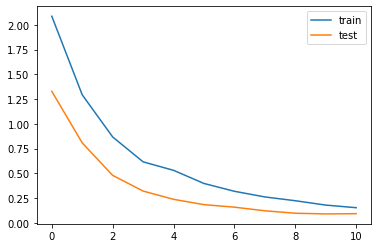

In [13]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Auxiliary functions to show the results


In [14]:
#Fuction to show the reasults 
def getSpeaker(speaker):
    speaker = str(speaker)
    if speaker == "0":
        return "Jackson"
    elif speaker == "1":
        return "Nicola"
    elif speaker == "2":
        return "Theo"
    elif speaker == "3":
        return "Ankur"
    elif speaker == "4":
        return "Caroline"
    elif speaker == "5":
        return "Rodolfo"
    else: 
        speaker = "Unknown"
        
def printPrediction(X_data, y_data, printDigit):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        prediction = getSpeaker(model.predict_classes(X_data[i:i+1])[0])
        speaker = getSpeaker(y_data[i])
        print(type(speaker))
        if printDigit == True:
            print("Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}".format(i, str(speaker), prediction, speaker==prediction))
        else:
            print("y={0:10s}- prediction={1:10s}- match={2}".format(str(speaker), prediction, speaker==prediction))

In [15]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = model.predict_classes(X_data)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    target_names = ["Jackson", "Nicola", "Theo", "Ankur", "Caroline", "Rodolfo", "Unknown"]
    print(classification_report(y_test_num, Y_pred))


### Present the model performance

In [16]:
y_test=y_test.astype('float64')
print(type(y_test[1]))
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10], False)

<class 'numpy.float64'>

# TEST DATA #

1/1 [==============================] - 0s 14ms/step - loss: 0.1132 - accuracy: 0.9667
accuracy: 96.67%

# Generate predictions
<class 'NoneType'>
y=None      - prediction=Theo      - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Nicola    - match=False
<class 'NoneType'>
y=None      - prediction=Nicola    - match=False


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<class 'NoneType'>
y=None      - prediction=Theo      - match=False
<class 'NoneType'>
y=None      - prediction=Nicola    - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Theo      - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Nicola    - match=False


Classification Report for Test Data

[[10  0  0]
 [ 0 10  0]
 [ 1  0  9]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


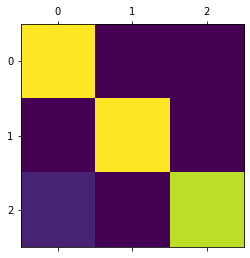


Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [17]:
print("Classification Report for Test Data\n")
report(X_test, y_test)


## Section 3

There are 50 recordings for each digit for each speaker: Jackson, Nicolas and Theo (total 1500 recordings)
Training data has 49 recordings for each digit for each speaker: 1470 recordings total.
Test data has 1 recordings for each digit for each speaker: 30 recordings total.

In addition, there are 2 recordings for each digit for each speaker: Ankur, Caroline and Rodolfo (total 60 recordings)
This addition training data has 1 recordings for each digit for each speaker: 30 recordings total.
This addition test data has 1 recordings for each digit for each speaker: 30 recordings total.

Therefore the full data set has:
* Training: 1500 recordings
* Training: 60 recordings

The data used here comes from the recordings stored in:
* ../data/recordings/train
* ../data/recordings/test
* ../data/recordings/moreSpeakersTrain
* ../data/recordings/moreSpeakersTest

In [19]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split

fullTrainData = trainData.append(moreTrainData)

X = np.array(fullTrainData.iloc[:, :-1], dtype = float)
y = fullTrainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

#to float 
y_train=y_train.astype('float64')
y_val=y_val.astype('float64')

X_more_test = np.array(moreTestData.iloc[:, :-1], dtype = float)
y_more_test = moreTestData.iloc[:, -1]


print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)
print("Y from other speakers test data:", y_more_test.shape)
fullTrainData

Y from training data: (1050,)
Y from validation data: (450,)
Y from test data: (30,)
Y from other speakers test data: (30,)


,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,number
0,0.087319,829.198417,800.903111,1473.124426,0.042883,-303.595663,213.682367,-38.200757,-2.329614,8.204157,-38.143836,-12.176614,-19.031963,-29.155537,4.714664,-4.210158,-13.328276,-1.340355,-18.168178,-5.210740,13.773573,-19.089013,-17.640466,7.411407,-13.051958,0
1,0.935458,1409.889900,1288.562672,2964.404297,0.039062,28.321260,210.838076,-90.089424,38.338328,28.176799,-38.006319,23.009903,4.318815,-26.432799,15.993199,-5.743022,-18.292063,11.274942,-12.879364,-16.745001,7.328799,-7.491760,-1.899807,8.977181,-9.099283,1
2,0.098626,823.451640,765.603431,1423.458059,0.046258,-296.775368,225.875215,-43.422120,-2.082744,11.165008,-45.519667,-17.365076,-11.000794,-24.710233,-1.127723,-4.384489,-9.875724,-2.984213,-16.835924,-5.174156,7.225061,-17.521406,-12.230263,3.140596,-14.405218,0
3,0.004241,1887.218045,1125.280956,3143.214327,0.164522,-561.891019,146.842899,-76.942194,35.137652,28.288108,-44.462003,6.161524,-4.805164,-26.189146,11.868462,-10.866577,-17.520374,14.824739,-4.762821,-1.685328,14.981241,-11.878802,-0.440523,14.394066,-15.875212,2
4,0.896434,1531.667146,1210.204884,3080.381373,0.084087,25.395609,240.478420,-111.826417,39.888789,36.293767,-53.422653,26.242240,3.472568,-38.743158,20.779211,-4.401902,-20.824611,21.785070,-5.924478,-8.800863,18.616281,-9.469304,-4.516639,10.042933,-13.775798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,0.026959,1237.544903,1219.890113,2372.379244,0.059871,-378.096522,180.817033,-41.006126,22.502396,-8.963315,-7.432202,-5.603149,-5.545285,-20.104742,-9.878692,-17.628866,-32.601865,-4.715012,-8.889857,-11.225335,-10.951421,-8.972345,-4.716432,-5.655876,-7.133626,5
26,0.165780,1042.919916,851.096880,1658.470741,0.063570,-208.076160,202.338446,-71.798547,-8.246893,10.156478,-0.962430,-0.589258,9.314730,-10.180892,-3.279781,-3.270903,-23.695770,-15.617097,-18.535029,-18.525861,-19.764579,-10.160659,-6.533717,-15.392686,-8.234721,5
27,0.121945,1441.034481,1009.204458,2250.892639,0.105972,-250.717752,196.380303,-56.107659,-11.879307,12.757448,-4.921544,-16.424226,-0.869687,-19.323603,0.777163,3.860013,-25.101084,-8.305551,-11.400265,-13.937508,-19.808112,-17.995939,-1.534772,-6.876552,-6.328373,5
28,0.093617,2050.160433,1779.104741,3592.318021,0.146315,-235.528464,121.842236,-27.965981,29.540452,-20.832103,25.515092,-31.457466,-10.977950,-10.844078,-5.213486,-9.623610,-12.869157,0.492923,-12.442138,-4.629561,-9.476375,-1.582844,-7.905292,-10.843798,-3.412077,3


In [20]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )
X_more_test = scaler.transform( X_more_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)
print("X from other speakers test data", X_more_test.shape)


X from training data (1050, 25)
X from validation data (450, 25)
X from test data (30, 25)
X from other speakers test data (30, 25)


In [21]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    callbacks=[es])

Epoch 1/50
9/9 [==============================] - 1s 21ms/step - loss: 2.3765 - accuracy: 0.1391 - val_loss: 1.5743 - val_accuracy: 0.8689
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 1.4923 - accuracy: 0.5407 - val_loss: 0.8533 - val_accuracy: 0.8800
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.9194 - accuracy: 0.7060 - val_loss: 0.5613 - val_accuracy: 0.8644
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6792 - accuracy: 0.7396 - val_loss: 0.4842 - val_accuracy: 0.8733
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6012 - accuracy: 0.7821 - val_loss: 0.4013 - val_accuracy: 0.8867
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4860 - accuracy: 0.8208 - val_loss: 0.3129 - val_accuracy: 0.9178
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.8354 - val_loss: 0.2489 - val_accuracy: 0.9222
Epoch 8/50
9/9 [=================

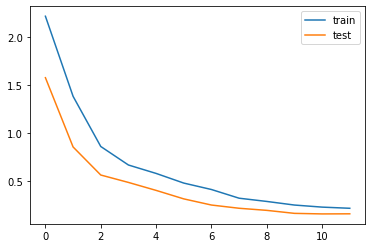

In [22]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Present the model performance

In [23]:
print('\n# TEST DATA #\n')
y_test=y_test.astype('float64')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10], False)


# TEST DATA #

1/1 [==============================] - 0s 14ms/step - loss: 0.1154 - accuracy: 0.9667
accuracy: 96.67%

# Generate predictions
<class 'NoneType'>
y=None      - prediction=Theo      - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Nicola    - match=False
<class 'NoneType'>
y=None      - prediction=Nicola    - match=False
<class 'NoneType'>
y=None      - prediction=Theo      - match=False


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<class 'NoneType'>
y=None      - prediction=Nicola    - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Theo      - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Nicola    - match=False


In [ ]:
y_more_test=y_more_test.astype('float64')
print('\n# OTHER SPEAKERS DATA #\n')
score = model.evaluate(X_more_test, y_more_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_more_test[0:10], y_more_test[0:10], False)



# OTHER SPEAKERS DATA #

1/1 [==============================] - 0s 19ms/step - loss: 3.0102 - accuracy: 0.3000
accuracy: 30.00%

# Generate predictions
<class 'NoneType'>
y=None      - prediction=Ankur     - match=False
<class 'NoneType'>
y=None      - prediction=Ankur     - match=False
<class 'NoneType'>
y=None      - prediction=Ankur     - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<class 'NoneType'>
y=None      - prediction=Ankur     - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False
<class 'NoneType'>
y=None      - prediction=Jackson   - match=False


Classification Report for Test Data

[[10  0  0]
 [ 0 10  0]
 [ 1  0  9]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


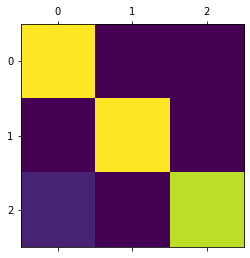


Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Classification Report for Other Speakers

[[ 0  0  0  0]
 [ 0 10  0  0]
 [ 8  2  0  0]
 [10  0  0  0]]


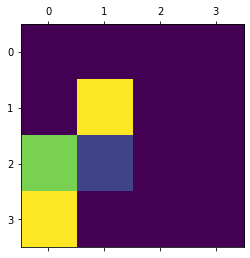


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           3       0.83      1.00      0.91        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10

    accuracy                           0.33        30
   macro avg       0.21      0.25      0.23        30
weighted avg       0.28      0.33      0.30        30



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

print("Classification Report for Other Speakers\n")
report(X_more_test, y_more_test)


In [25]:
%matplotlib inline
# from memory_profiler import memory_usage
import os
import pandas as pd
from glob import glob
import numpy as np

In [26]:
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
# from path import Path

In [27]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

import os
from glob import glob


In [28]:
ipd.Audio('drive/MyDrive/data/recordings/train/'+str("0_jackson_0")+'.wav')

In [29]:
#Read Training data
train = pd.read_csv('train.csv')
train = train.drop(['label'],axis=1)
train['label']=y[:1470]    

print(y.shape)
print(y[:1470].shape)
train

(1500,)
(1470,)


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,5_jackson_22.wav,0.266189,0.087319,829.198417,800.903111,1473.124426,0.042883,-303.595663,213.682367,-38.200757,-2.329614,8.204157,-38.143836,-12.176614,-19.031963,-29.155537,4.714664,-4.210158,-13.328276,-1.340355,-18.168178,-5.210740,13.773573,-19.089013,-17.640466,7.411407,-13.051958,0
1,2_nicolas_23.wav,0.344473,0.935458,1409.889900,1288.562672,2964.404297,0.039062,28.321260,210.838076,-90.089424,38.338328,28.176799,-38.006319,23.009903,4.318815,-26.432799,15.993199,-5.743022,-18.292063,11.274942,-12.879364,-16.745001,7.328799,-7.491760,-1.899807,8.977181,-9.099283,1
2,5_jackson_30.wav,0.293518,0.098626,823.451640,765.603431,1423.458059,0.046258,-296.775368,225.875215,-43.422120,-2.082744,11.165008,-45.519667,-17.365076,-11.000794,-24.710233,-1.127723,-4.384489,-9.875724,-2.984213,-16.835924,-5.174156,7.225061,-17.521406,-12.230263,3.140596,-14.405218,0
3,6_theo_15.wav,0.304564,0.004241,1887.218045,1125.280956,3143.214327,0.164522,-561.891019,146.842899,-76.942194,35.137652,28.288108,-44.462003,6.161524,-4.805164,-26.189146,11.868462,-10.866577,-17.520374,14.824739,-4.762821,-1.685328,14.981241,-11.878802,-0.440523,14.394066,-15.875212,2
4,7_nicolas_41.wav,0.483585,0.896434,1531.667146,1210.204884,3080.381373,0.084087,25.395609,240.478420,-111.826417,39.888789,36.293767,-53.422653,26.242240,3.472568,-38.743158,20.779211,-4.401902,-20.824611,21.785070,-5.924478,-8.800863,18.616281,-9.469304,-4.516639,10.042933,-13.775798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6_theo_42.wav,0.313961,0.004184,2011.289670,1076.887918,3098.089600,0.177295,-549.287225,165.984053,-95.483937,37.583228,30.980632,-50.817221,9.236211,-3.060315,-30.003594,16.682528,-7.906502,-22.742691,16.610216,-1.192079,-4.385965,15.346784,-12.254773,-8.209184,7.078721,-20.001743,2
1466,9_jackson_45.wav,0.299160,0.059129,921.767580,976.426927,2038.027954,0.028463,-336.756764,210.869652,-51.933488,28.045116,31.216916,-38.449083,10.647423,3.576265,-33.155968,5.303811,0.424869,-22.447210,-3.730911,-10.790297,-15.023226,-4.921185,-17.712315,-8.796724,0.513296,-19.822340,0
1467,4_jackson_46.wav,0.314511,0.092868,816.773219,776.634774,1334.122368,0.048234,-316.106998,205.612645,-16.174475,-6.785233,-4.124221,-30.145827,1.871831,-6.593072,-22.984414,-2.470997,-15.508469,-16.533680,7.236527,-10.662496,-13.374570,8.669997,-7.599188,-12.972528,0.481492,-18.023768,0
1468,2_nicolas_7.wav,0.339177,0.919854,1519.445885,1154.247446,2926.031025,0.063552,20.208669,224.337757,-110.462091,34.880254,35.719002,-44.010802,25.349661,6.750227,-30.424120,17.987105,-7.663602,-25.981717,11.961195,-8.605128,-12.409140,13.030372,-8.705964,-5.942218,9.160887,-9.638414,1


In [30]:
#read Test data
data=pd.read_csv('test.csv')
data = data.drop(['label'],axis=1)
y_test=y_test.astype('str')
data['label']=y_test
y_test.shape

(30,)

In [31]:
val=data[:15]
val_test=y_test[:15].to_string

test=data[15:]
test_test=y_test[15:].to_string
test

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
15,8_jackson_49.wav,0.417892,0.073177,1532.830339,1243.656062,3000.292969,0.102237,-334.078493,153.121090,-50.333286,61.101107,36.124949,-62.300493,-5.937624,0.695647,-37.983558,-11.898082,-17.173094,-21.924390,3.803674,-12.116421,-13.508958,4.992863,-12.830678,-10.149385,2.931165,-11.975785,0.0
16,7_theo_49.wav,0.279762,0.007149,1302.588207,1008.264427,2307.417297,0.098724,-541.731564,190.250257,-62.079309,31.943896,30.885634,-44.865611,2.797026,-2.991227,-28.695350,12.692840,-1.583356,-23.163730,1.422575,-6.538444,-6.601795,5.911835,-16.780256,-10.702021,5.963660,-16.946565,2.0
17,0_nicolas_49.wav,0.363441,0.938021,1258.906694,1132.791625,2722.155762,0.032308,8.051629,237.589876,-97.515622,32.154464,34.761034,-44.471609,23.656901,6.325487,-32.198471,14.747901,-8.594356,-24.751578,11.571049,-10.200722,-12.621425,11.128701,-12.014757,-5.246127,11.681940,-10.461592,1.0
18,0_theo_49.wav,0.301737,0.006984,958.934867,941.639039,2084.106445,0.040039,-542.812619,217.971314,-62.197265,21.537389,37.756236,-27.988831,2.581564,-17.865338,-36.233291,9.015741,-12.012027,-26.797356,5.341060,-12.159103,-14.180812,9.346473,-10.899974,-9.715154,5.997578,-12.574760,2.0
19,6_theo_49.wav,0.332801,0.004734,1737.899732,1096.887759,2922.055664,0.154590,-557.728622,164.581758,-73.123849,39.093093,35.661392,-42.822331,1.649491,-7.446646,-25.811299,12.847124,-11.331798,-22.074667,13.459288,-2.127383,-3.367854,14.767413,-8.133941,-2.911340,8.576642,-19.307455,2.0
20,2_nicolas_49.wav,0.360890,0.920426,1549.529591,1178.731590,2990.423584,0.079590,20.340213,225.764125,-109.865030,36.560437,37.291678,-44.705020,24.591898,2.020668,-34.831313,20.118777,-4.684955,-23.457336,13.246594,-11.210630,-12.442070,15.219148,-9.811547,-5.383876,12.833581,-7.563292,1.0
21,1_jackson_49.wav,0.266056,0.071547,759.877794,899.957003,1427.553489,0.030429,-355.530408,204.388970,-20.676433,26.671135,15.797893,-32.680017,9.229471,-10.626460,-36.910628,7.184837,-0.341873,-18.198523,4.029843,-10.552086,-21.039102,-5.634321,-14.788966,-11.016037,-1.313916,-16.993852,0.0
22,6_nicolas_49.wav,0.412596,0.886463,1502.232801,1199.314799,3012.854004,0.078206,22.038938,236.614970,-112.816159,38.869232,37.793540,-48.687667,24.992948,2.980350,-36.592598,15.066803,-13.152929,-27.102019,16.885966,-6.227304,-10.334609,12.039294,-11.824831,-0.425383,15.836424,-10.361940,1.0
23,3_nicolas_49.wav,0.442994,0.911146,1635.437233,1238.827672,3089.296875,0.098405,31.430132,223.880094,-110.126710,41.172524,36.065779,-45.215130,27.961457,3.989179,-32.617953,23.626008,-1.866738,-21.406394,15.215508,-7.544204,-8.610702,14.702138,-11.336433,-3.831059,13.768250,-9.473421,1.0
24,1_nicolas_49.wav,0.357149,0.931735,1423.449100,1214.272679,2977.862549,0.055827,30.483808,239.172269,-105.410940,38.254106,30.819313,-47.658563,25.188422,1.816517,-34.224579,20.310016,-3.584185,-18.912839,17.553396,-6.124243,-5.922193,17.034998,-10.589875,-5.521531,8.205183,-14.487789,1.0


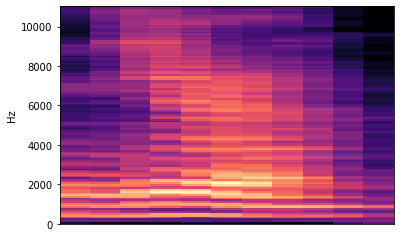

In [32]:
#Visualisation
filename="drive/MyDrive/data/recordings/train/0_jackson_0.wav"

X, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
plt.show()

In [37]:
# Although this function was modified and many parameteres were explored with, most of it 
# came from Source 18 (sources in the READ.ME)

def images(file):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join('/content/drive/MyDrive/data/recordings/test/'+str(file.filename))
    print(file.filename)
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = file.filename
    file  = 'val_images/' + str(name[:-4]) + '.jpg'
    print(file)
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

In [34]:
train.apply(images, axis=1);

5_jackson_22.wav
train_images/5_jackson_22.jpg
2_nicolas_23.wav
train_images/2_nicolas_23.jpg
5_jackson_30.wav
train_images/5_jackson_30.jpg
6_theo_15.wav
train_images/6_theo_15.jpg
7_nicolas_41.wav
train_images/7_nicolas_41.jpg
5_theo_45.wav
train_images/5_theo_45.jpg
1_nicolas_15.wav
train_images/1_nicolas_15.jpg
9_nicolas_43.wav
train_images/9_nicolas_43.jpg
2_jackson_0.wav
train_images/2_jackson_0.jpg
1_theo_3.wav
train_images/1_theo_3.jpg
7_jackson_45.wav
train_images/7_jackson_45.jpg
2_jackson_13.wav
train_images/2_jackson_13.jpg
8_nicolas_7.wav
train_images/8_nicolas_7.jpg
5_nicolas_36.wav
train_images/5_nicolas_36.jpg
0_jackson_40.wav
train_images/0_jackson_40.jpg
9_nicolas_31.wav
train_images/9_nicolas_31.jpg
7_jackson_35.wav
train_images/7_jackson_35.jpg
0_theo_30.wav
train_images/0_theo_30.jpg
8_theo_26.wav
train_images/8_theo_26.jpg
8_theo_45.wav
train_images/8_theo_45.jpg
0_theo_18.wav
train_images/0_theo_18.jpg
2_nicolas_19.wav
train_images/2_nicolas_19.jpg
6_nicolas_22.w

In [36]:
test.apply(images, axis=1);

8_jackson_49.wav
test_images/8_jackson_49.jpg
7_theo_49.wav
test_images/7_theo_49.jpg
0_nicolas_49.wav
test_images/0_nicolas_49.jpg
0_theo_49.wav
test_images/0_theo_49.jpg
6_theo_49.wav
test_images/6_theo_49.jpg
2_nicolas_49.wav
test_images/2_nicolas_49.jpg
1_jackson_49.wav
test_images/1_jackson_49.jpg
6_nicolas_49.wav
test_images/6_nicolas_49.jpg
3_nicolas_49.wav
test_images/3_nicolas_49.jpg
1_nicolas_49.wav
test_images/1_nicolas_49.jpg
3_jackson_49.wav
test_images/3_jackson_49.jpg
6_jackson_49.wav
test_images/6_jackson_49.jpg
3_theo_49.wav
test_images/3_theo_49.jpg
5_nicolas_49.wav
test_images/5_nicolas_49.jpg
4_theo_49.wav
test_images/4_theo_49.jpg


In [38]:
val.apply(images, axis=1);

2_theo_49.wav
val_images/2_theo_49.jpg
9_jackson_49.wav
val_images/9_jackson_49.jpg
9_nicolas_49.wav
val_images/9_nicolas_49.jpg
4_nicolas_49.wav
val_images/4_nicolas_49.jpg
8_theo_49.wav
val_images/8_theo_49.jpg
7_nicolas_49.wav
val_images/7_nicolas_49.jpg
7_jackson_49.wav
val_images/7_jackson_49.jpg
1_theo_49.wav
val_images/1_theo_49.jpg
4_jackson_49.wav
val_images/4_jackson_49.jpg
8_nicolas_49.wav
val_images/8_nicolas_49.jpg
2_jackson_49.wav
val_images/2_jackson_49.jpg
5_jackson_49.wav
val_images/5_jackson_49.jpg
0_jackson_49.wav
val_images/0_jackson_49.jpg
5_theo_49.wav
val_images/5_theo_49.jpg
9_theo_49.wav
val_images/9_theo_49.jpg


In [39]:
plt.close('all')

In [40]:
def make_jpg(files):
    return str(files[:-4])+'.jpg'

#change images filename
train['filename'] = train["filename"].apply(make_jpg)
val['filename'] = val["filename"].apply(make_jpg)
test['filename'] = test["filename"].apply(make_jpg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [41]:
# Rescaling the images as usual to feed into the CNN
datagen=ImageDataGenerator(rescale=1./255.)

In [42]:
train_generator=datagen.flow_from_dataframe(
    dataframe=train,
    directory="train_images",
    x_col="filename",
    y_col="label",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))


Found 1470 validated image filenames belonging to 3 classes.


In [43]:
val_generator=datagen.flow_from_dataframe(
    dataframe=val,
    directory="val_images",
    x_col="filename",
    y_col="label",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    
    target_size=(64,64))


Found 15 validated image filenames belonging to 3 classes.


In [44]:
test_generator=datagen.flow_from_dataframe(
    dataframe=test,
    directory="test_images",
    x_col="filename",
    y_col="label",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 15 validated image filenames belonging to 3 classes.


In [45]:
plt.close('all')

In [46]:
# Building our model 
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [47]:
# Compiling using adam and categorical crossentropy
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [48]:
# Fitting our CNN with 50 epochs and setting the results to history for visuals
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit_generator(generator=train_generator,
                    validation_data=val_generator,
                    validation_steps=32,
                    epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
46/46 [==============================] - 10s 84ms/step - loss: 1.1002 - accuracy: 0.3589 - val_loss: 0.8618 - val_accuracy: 0.7333
Epoch 2/50
46/46 [==============================] - 4s 78ms/step - loss: 0.8386 - accuracy: 0.6555
Epoch 3/50
46/46 [==============================] - 4s 78ms/step - loss: 0.5876 - accuracy: 0.7124
Epoch 4/50
46/46 [==============================] - 4s 78ms/step - loss: 0.6193 - accuracy: 0.7173
Epoch 5/50
46/46 [==============================] - 4s 78ms/step - loss: 0.5641 - accuracy: 0.7474
Epoch 6/50
46/46 [==============================] - 4s 78ms/step - loss: 0.4734 - accuracy: 0.7657
Epoch 7/50
46/46 [==============================] - 4s 78ms/step - loss: 0.3917 - accuracy: 0.8121
Epoch 8/50
46/46 [==============================] - 4s 79ms/step - loss: 0.4428 - accuracy: 0.7877
Epoch 9/50
46/46 [==============================] - 4s 79ms/step - loss: 0.3462 - accuracy: 0.8513
Epoch 10/50
46/46 [==============================] - 4s 79ms/step 

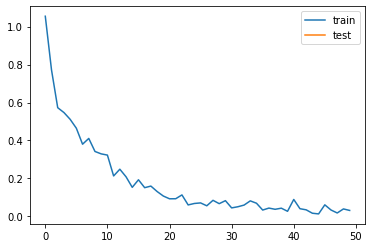

In [49]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

[0.4020408093929291, 0.6768707633018494, 0.7265306115150452, 0.74217689037323, 0.7680271863937378, 0.7795918583869934, 0.819727897644043, 0.8108843564987183, 0.8612244725227356, 0.864625871181488, 0.8721088171005249, 0.9244897961616516, 0.9006802439689636, 0.9265305995941162, 0.9442176818847656, 0.9217687249183655, 0.9476190209388733, 0.9435374140739441, 0.9551020264625549, 0.9666666388511658, 0.9734693765640259, 0.9687075018882751, 0.961904764175415, 0.976190447807312, 0.974829912185669, 0.9789115786552429, 0.9789115786552429, 0.9727891087532043, 0.9755101799964905, 0.9741496443748474, 0.9843537211418152, 0.9836734533309937, 0.9843537211418152, 0.9721088409423828, 0.9768707752227783, 0.9891156554222107, 0.9897959232330322, 0.9877551198005676, 0.9877551198005676, 0.9918367266654968, 0.9707483053207397, 0.9870748519897461, 0.9897959232330322, 0.9952380657196045, 0.9965986609458923, 0.9850339889526367, 0.9884353876113892, 0.9931972622871399, 0.9857142567634583, 0.9863945841789246]
[0.733

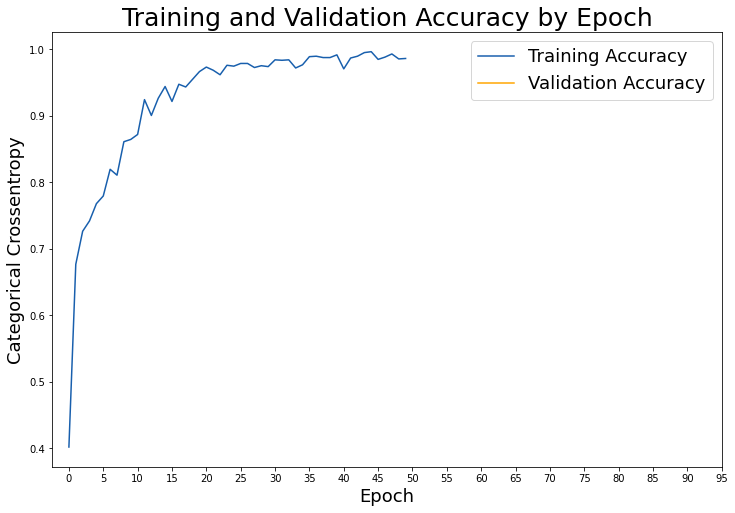

In [50]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(train_accuracy)

print(val_accuracy)
# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18)
plt.show();

In [ ]:
# Generating a new test dataframe that includes the labels for comparison and 
# checking the accuracy of our model with this never before seen data
test = data[4435:]

# Generating predictions on our never seen data with the model we built
preds = model.predict_generator(test_generator)

# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(preds)):
    p.append(np.where(preds[i] == max(preds[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(preds)):
    predictions.append(p[i][0][0])
    
# Adding those predictions to our test dataframe
test['predictions'] = predictions

# Changing the numeric values to their corresponding labels
test['predictions'] = test['predictions'].map({8:'siren', 9:'street_music', 7:'jackhammer',
                   4:'drilling', 3:'dog_bark', 2:'children_playing',
                   6:'gun_shot', 5:'engine_idling', 0:'air_conditioner',
                   1:'car_horn'})

# Checking the percentage of correct predictions 
round(len(test[test['Class'] == test['predictions']])/len(test),2)